In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
img_height, img_width = 128, 128
batch_size = 20

train_ds = tf.keras.utils.image_dataset_from_directory(
    "data/train",
    labels = 'inferred',
    label_mode= 'categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(224,224),
    shuffle= True,
    seed=None,
    validation_split=None,
    subset= None,
    interpolation = "bilinear",
    follow_links= False,
    crop_to_aspect_ratio = False
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "data/validation",
    labels = 'inferred',
    label_mode= 'categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(224,224),
    shuffle= True,
    seed=None,
    validation_split=None,
    subset= None,
    interpolation = "bilinear",
    follow_links= False,
    crop_to_aspect_ratio = False
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "data/test",
    labels = 'inferred',
    label_mode= 'categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(224,224),
    shuffle= True,
    seed=None,
    validation_split=None,
    subset= None,
    interpolation = "bilinear",
    follow_links= False,
    crop_to_aspect_ratio = False
)

Found 3744 files belonging to 38 classes.
Found 371 files belonging to 38 classes.
Found 379 files belonging to 38 classes.


In [3]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32, (3, 3), activation="relu", padding='same', data_format='channels_first', input_shape=(224, 224, 3)),
     tf.keras.layers.MaxPooling2D(padding='same', data_format='channels_last'),
     tf.keras.layers.Conv2D(64, (3, 3), activation="relu", padding='same', data_format='channels_first'),
     tf.keras.layers.MaxPooling2D(pool_size=2, strides=2, padding='same', data_format='channels_last'),
     tf.keras.layers.Conv2D(128, (3, 3), activation="relu", padding='same', data_format='channels_first'),
     tf.keras.layers.MaxPooling2D(pool_size=2, strides=2, padding='same', data_format='channels_last'),
     tf.keras.layers.Conv2D(256, (3, 3), activation="relu", padding='same', data_format='channels_first'),
     tf.keras.layers.MaxPooling2D(pool_size=2, strides=2, padding='same', data_format='channels_last'),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(units=512, activation='relu'),
     tf.keras.layers.Dense(units=512, activation='relu'),
     tf.keras.layers.Dropout(0.4),
     tf.keras.layers.Dense(units=38, activation='softmax')
    ]
)


In [5]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [6]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 40
)

Epoch 1/40


117/117 [==============================] - 55s 406ms/step - loss: 3.5666 - accuracy: 0.1290 - val_loss: 3.7337 - val_accuracy: 0.0270
Epoch 2/40
117/117 [==============================] - 48s 397ms/step - loss: 3.5027 - accuracy: 0.1330 - val_loss: 3.7011 - val_accuracy: 0.0485
Epoch 3/40
117/117 [==============================] - 48s 393ms/step - loss: 3.1258 - accuracy: 0.1632 - val_loss: 3.1596 - val_accuracy: 0.1051
Epoch 4/40
117/117 [==============================] - 48s 397ms/step - loss: 2.8896 - accuracy: 0.1888 - val_loss: 2.7296 - val_accuracy: 0.1617
Epoch 5/40
117/117 [==============================] - 47s 384ms/step - loss: 2.7005 - accuracy: 0.2171 - val_loss: 2.5897 - val_accuracy: 0.1968
Epoch 6/40
117/117 [==============================] - 48s 397ms/step - loss: 2.5076 - accuracy: 0.2500 - val_loss: 2.3195 - val_accuracy: 0.2372
Epoch 7/40
117/117 [==============================] - 50s 408ms/step - loss: 2.4055 - accuracy: 0.2810 - val_loss: 2.2291 - val_

In [7]:
test_loss,test_accuracy = model.evaluate(test_ds)

12/12 [==============================] - 3s 91ms/step - loss: 0.7189 - accuracy: 0.9367


1/1 [==============================] - 0s 118ms/step
Classification Report:
                precision    recall  f1-score   support

        apple       1.00      0.70      0.82        10
       banana       1.00      0.78      0.88         9
     beetroot       0.91      1.00      0.95        10
  bell pepper       0.82      1.00      0.90         9
      cabbage       1.00      1.00      1.00        10
     capsicum       1.00      0.80      0.89        10
       carrot       0.82      1.00      0.90         9
  cauliflower       0.83      1.00      0.91        10
chilli pepper       1.00      0.89      0.94         9
         corn       1.00      1.00      1.00        10
     cucumber       1.00      1.00      1.00        10
     eggplant       1.00      1.00      1.00        10
       garlic       1.00      1.00      1.00        10
       ginger       0.83      1.00      0.91        10
       grapes       1.00      1.00      1.00         9
     jalepeno       1.00      1.00      1.

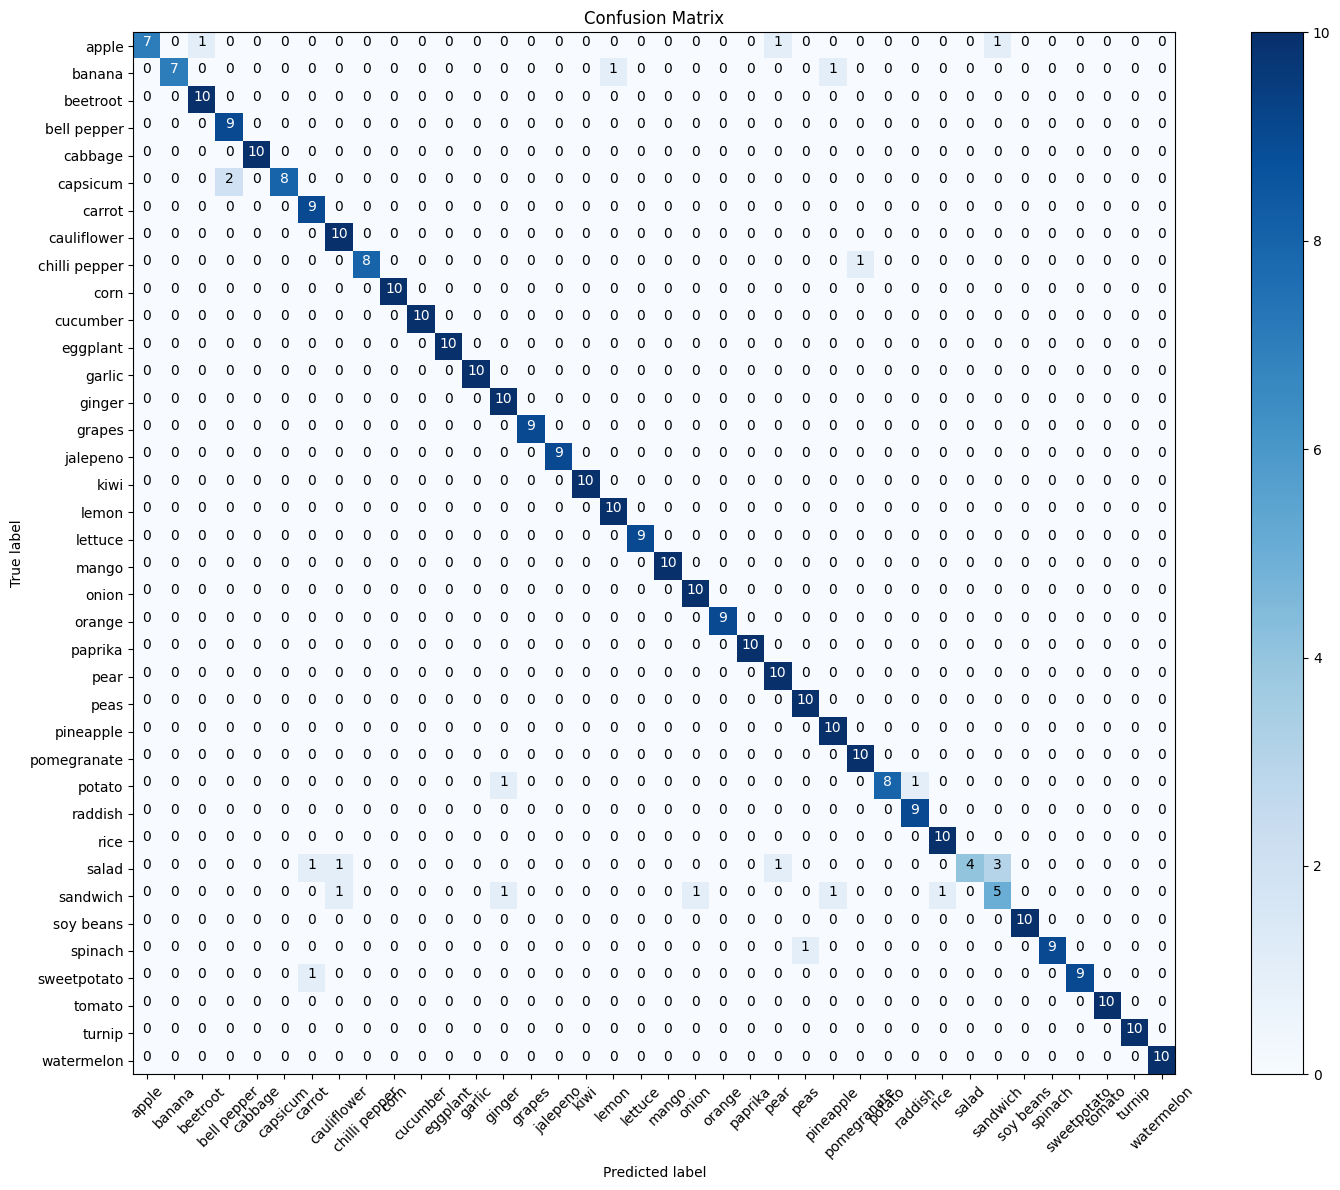

In [8]:
import itertools
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

true_labels = []
predicted_labels = []

# Iterate through the validation set and make predictions
for images, labels in val_ds:
    true_labels.extend(np.argmax(labels, axis=1))  # Get true labels
    predictions = model.predict(images)
    predicted_labels.extend(np.argmax(predictions, axis=1))  # Get predicted labels

# Create a classification report
class_names = val_ds.class_names
report = classification_report(true_labels, predicted_labels, target_names=class_names)

# Print the classification report
print("Classification Report:\n", report)

# Create a confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(16, 12))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
plot_confusion_matrix(confusion, class_names)
plt.show()

In [22]:
import numpy as np

sunflower_url = "https://befreshcorp.net/wp-content/uploads/2017/07/product-packshot-Orange.jpg"
sunflower_path = tf.keras.utils.get_file('orange', origin=sunflower_url)

img = tf.keras.utils.load_img(
    "pomegranate.jpg", target_size=(224, 224)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(val_ds.class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 31ms/step
This image most likely belongs to apple with a 6.08 percent confidence.
